In [3]:
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_location = "/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Final/New Dataset"
test_location = "/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Final/New Dataset"
filepath = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/CNN_DenseNet169.keras'


In [6]:
preprocess_input = tensorflow.keras.applications.mobilenet.preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
img_size=224
batch_size=10
num_class=5

In [8]:
# Complete Dataset images can be loaded using ImageDataGenerator function

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory(test_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)


Found 530 images belonging to 5 classes.
Found 530 images belonging to 5 classes.


In [9]:
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

In [10]:
DenseNet = DenseNet169(input_shape=[img_size,img_size] + [3], weights='imagenet', include_top=False)

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
DenseNet.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 12,484,480 (47.62 MB)

 Non-trainable params: 158,400 (618.75 KB)

In [12]:
for layer in DenseNet.layers:
  layer.trainable = False

In [13]:
x = Flatten()(DenseNet.output)
prediction = Dense(num_class, activation='softmax')(x)

In [14]:
detection = Model(inputs=DenseNet.input, outputs=prediction)


In [15]:
detection.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 13,050,565 (49.78 MB)

 Trainable params: 407,685 (1.56 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [16]:
optimum=Adam(learning_rate=0.005)
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])



In [17]:
print(train_generator.class_indices)


{'Error': 0, 'Exudate': 1, 'Healthy': 2, 'Hemorrhage': 3, 'MA': 4}


In [18]:
TRAIN_STEPS=train_generator.n//train_generator.batch_size
TRAIN_STEPS

53

In [19]:
VALIDATION_STEPS=validation_generator.n//validation_generator.batch_size
VALIDATION_STEPS

53

In [20]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.5,
                              patience=2,
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

In [22]:
callbacks_list = [checkpoint, reduce_lr]
#callbacks_list = [checkpoint]

In [23]:
#history = detection.fit_generator(train_generator,
history = detection.fit(train_generator,
                              steps_per_epoch=TRAIN_STEPS,
                              #class_weight=class_weights,
                              validation_data=validation_generator,
                              validation_steps=VALIDATION_STEPS,
                              epochs=5,
                              verbose=1,
                              callbacks=callbacks_list
                             )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3439 - loss: 208.5091
Epoch 1: val_accuracy improved from -inf to 0.63585, saving model to /content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/CNN_DenseNet169.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.3456 - loss: 207.8292 - val_accuracy: 0.6358 - val_loss: 91.8942 - learning_rate: 0.0050
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7577 - loss: 44.9403
Epoch 2: val_accuracy improved from 0.63585 to 0.86415, saving model to /content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/CNN_DenseNet169.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.7576 - loss: 44.8348 - val_accuracy: 0.8642 - val_loss: 17.0540 - learning_rate: 0.0050
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8465 - loss: 18.2616
Epoch 3: val_accuracy did not improve from 0.86415
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.8466 - loss: 18.3134 - val_accura

In [24]:
# get the metric names so I can use evaulate_generator
detection.metrics_names

['loss', 'compile_metrics']

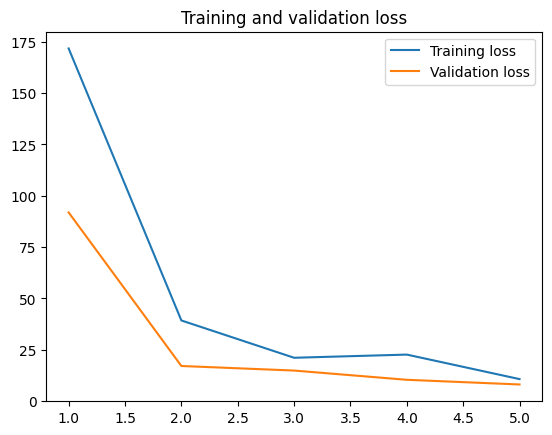

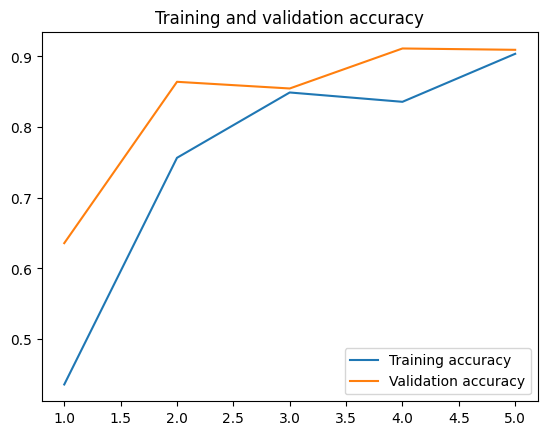

<Figure size 640x480 with 0 Axes>

In [25]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

In [26]:
epochs

range(1, 6)

In [27]:
loss

[171.79698181152344,
 39.2456169128418,
 21.061119079589844,
 22.606342315673828,
 10.664582252502441]

In [28]:
val_loss

[91.8941879272461,
 17.054046630859375,
 14.825994491577148,
 10.325788497924805,
 8.043734550476074]

In [29]:
acc

[0.43584907054901123,
 0.7566037774085999,
 0.849056601524353,
 0.8358490467071533,
 0.9037736058235168]

In [30]:
val_acc

[0.6358490586280823,
 0.8641509413719177,
 0.854716956615448,
 0.9113207459449768,
 0.9094339609146118]